# Neural Aesthete
In this notebook we will learn how to create a Neural Aesthete. 
The Neural Aesthete is a Multi-Layer Perceptron (MLP) that learns to predict a certain graph-aethetic criterion. This criterion is then used within an optimization problem to draw aesthetically-pleasing graphs.
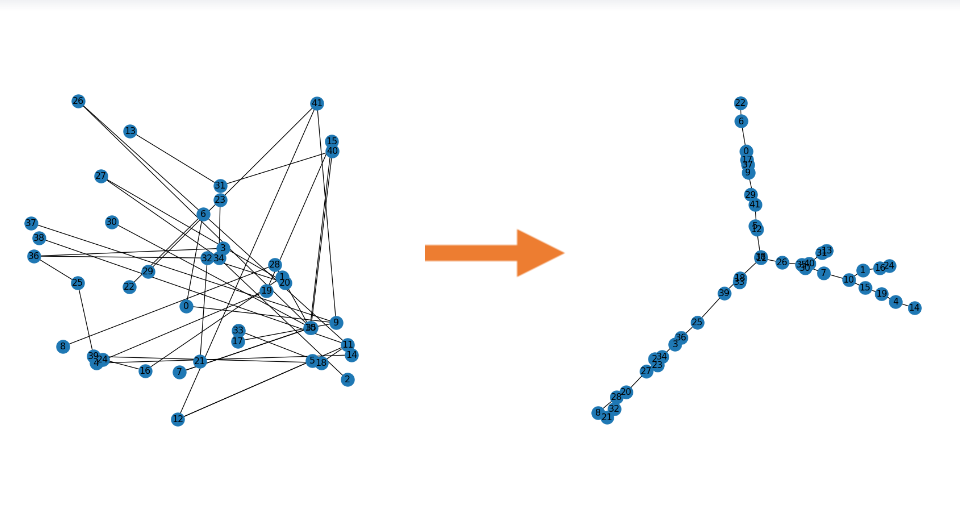


## Creating the Dataset

As in all Machine Learning problem, the first and most important thing to define is the training data. In this case we want the Neural Aesthete to discriminate intersecting from non-intersecting arcs. 



### Defining the input data
Each input data therefore is a couple of **edges** $d = (e_1, e_2)$. Each edge is again defined as a couple of points $e1 = (p_1, q_1)$ and each point is defined as a couple of coordinates. In total, therefore each input data is defined as $d = (e_1, e_2) = (p_1, q_1, p_2, q_2) = (x_0, y_0, x_1, y_1, x_2, y_2, x_3, y_3)$

Let's define the very simple class Point and see some examples of edges.

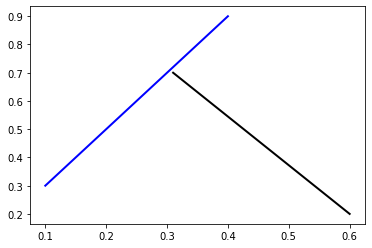

In [ ]:
from matplotlib import pyplot as plt

class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def equal(self, q):
        if q.x == self.x and q.y == self.y:
            return True
        else:
            return False
p1 = Point(.1, .3)
q1 = Point(.4, .9)
p2 = Point(.31, .7)
q2 = Point(.6, .2)

plt.plot([p1.x, q1.x], [p1.y, q1.y],  color='b', linestyle='-', linewidth=2)
plt.plot([p2.x, q2.x], [p2.y, q2.y],  color='k', linestyle='-', linewidth=2)
plt.show()

### Defining the labels $l$ 
Among other possible aesthetic criteria we will show here how to train the Neural Aesthete to discriminate **intersecting** edges.

Let's define a function that tell us whether two edges intersects or not. 

\begin{equation}
  \begin{cases}
      {a_1}x + {b_1}y + {c_1} = 0, \\  
      {a_2}x + {b_2}y + {c_2} = 0
  \end{cases}
\end{equation}


The solution of the system of equations above can be used to determine in which point **two lines** intersect. However we are dealing with edges which are **segments** not lines.



---


For lines we will use the orientation of triplets of points two belonging to the same edge and the last belongin to the other one. With two edges we can create 4 triplets:

(p1, q1, p2)
(p1, q1, q2)
(p2, q2, p1)
(p2, q2, q1)


Given a triplet of points p,q,r one can determine their orientation: 

*   clockiwise
*   counter-clockwise

In general, two edges intersects if the orientation of the points are different. However, it can also happen that some orientations are colinear, i.e., that one of the points exactly lie on the edges connecting the other two. Also in that case the edges intersects.


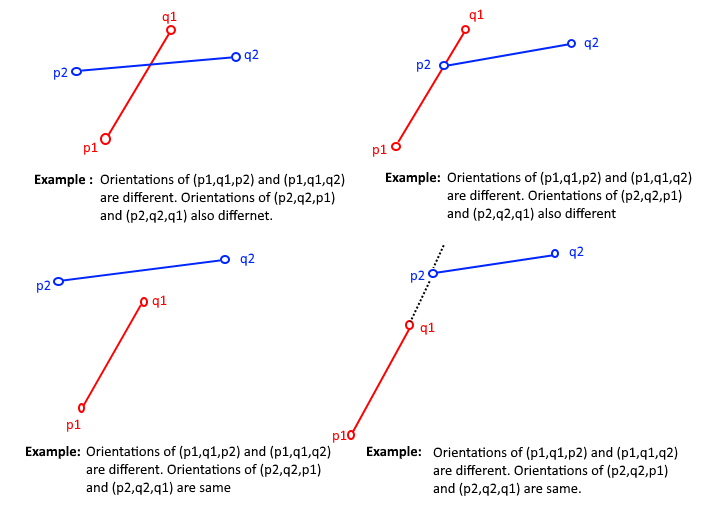


See https://www.geeksforgeeks.org/orientation-3-ordered-points/
for further details of below code.

In [ ]:
def orientation(p, q, r):
    # to find the orientation of an ordered triplet (p,q,r)
    # function returns the following values:
    # 0 : Colinear orientation
    # 1 : Clockwise orientation
    # 2 : Counterclockwise orientation

    val = (float(q.y - p.y) * (r.x - q.x)) - (float(q.x - p.x) * (r.y - q.y))
    if (val > 0):
        # Clockwise orientation
        return 1
    elif (val < 0):
        # Counterclockwise orientation
        return 2
    else:
        # Colinear orientation
        return 0


# Given three colinear points p, q, r, the function checks if
# point q lies on line segment 'pr'
def onSegment(p, q, r):
    if ((q.x <= max(p.x, r.x)) and (q.x >= min(p.x, r.x)) and
            (q.y <= max(p.y, r.y)) and (q.y >= min(p.y, r.y))):
        return True
    return False


def doIntersect(p1, q1, p2, q2):
    # Find the 4 orientations required for the general and special cases
    o1 = orientation(p1, q1, p2)
    o2 = orientation(p1, q1, q2)
    o3 = orientation(p2, q2, p1)
    o4 = orientation(p2, q2, q1)

    # Exception if two edges have a common nodes they are not intersecting
    if (p1.equal(p2) or p1.equal(q2) or q1.equal(p2) or q1.equal(q2)) and ((o1 != o2) and (o3 != o4)):
        return False

    # General case
    if ((o1 != o2) and (o3 != o4)):
        return True

    # Special Cases
    # p1, q1 and p2 are colinear and p2 lies on segment p1q1
    if ((o1 == 0) and onSegment(p1, p2, q1)):
        return True

    # p1, q1 and q2 are colinear and q2 lies on segment p1q1
    if ((o2 == 0) and onSegment(p1, q2, q1)):
        return True

    # p2, q2 and p1 are colinear and p1 lies on segment p2q2
    if ((o3 == 0) and onSegment(p2, p1, q2)):
        return True

    # p2, q2 and q1 are colinear and q1 lies on segment p2q2
    if ((o4 == 0) and onSegment(p2, q1, q2)):
        return True

    # If none of the cases
    return False


Let's check if the function works. The two previously created edges are almost, but not really intersecting. Therefore, the function *doInteresect*() returns False.

In [ ]:
doIntersect(p1, q1, p2, q2)

False

Now focus again on the previously created function and in particular on the lines:
```python
    if (p1.equal(p2) or p1.equal(q2) or q1.equal(p2) or 
        q1.equal(q2)) and ((o1 != o2) and (o3 != o4)):
        return False

```
This control line is used to check whether two edges having a common nodes should be labelled as intersecting or not. 
Since in the graph adjacent edges have a common nodes and we **don't want to separate** them we return *False*.  

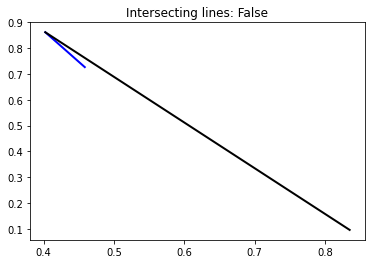

In [ ]:
import numpy as np
p1 = Point(np.random.uniform(0.0, 1.0), np.random.uniform(0.0, 1.0))
q1 = Point(np.random.uniform(0.0, 1.0), np.random.uniform(0.0, 1.0))
p2 = p1 
q2 = Point(np.random.uniform(0.0, 1.0), np.random.uniform(0.0, 1.0))
plt.plot([p1.x, q1.x], [p1.y, q1.y],  color='b', linestyle='-', linewidth=2)
plt.plot([p2.x, q2.x], [p2.y, q2.y],  color='k', linestyle='-', linewidth=2)
plt.title(f"Intersecting lines: {doIntersect(p1, q1, p2, q2)}")
plt.show()

Now let's further test the previously created function by creating different edges with different coordinates (just run many times the block below).

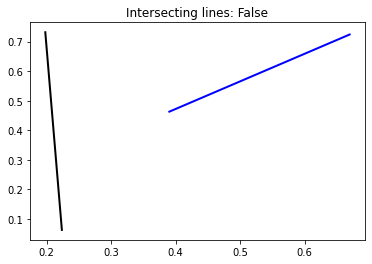

In [ ]:
p1 = Point(np.random.uniform(0.0, 1.0), np.random.uniform(0.0, 1.0))
q1 = Point(np.random.uniform(0.0, 1.0), np.random.uniform(0.0, 1.0))
p2 = Point(np.random.uniform(0.0, 1.0), np.random.uniform(0.0, 1.0))
q2 = Point(np.random.uniform(0.0, 1.0), np.random.uniform(0.0, 1.0))
plt.plot([p1.x, q1.x], [p1.y, q1.y],  color='b', linestyle='-', linewidth=2)
plt.plot([p2.x, q2.x], [p2.y, q2.y],  color='k', linestyle='-', linewidth=2)
plt.title(f"Intersecting lines: {doIntersect(p1, q1, p2, q2)}")
plt.show()

### Defining the CrossingDataset

Now let's create the CrossingDataset class! 

This dataset is composed of several couple of edges $x = (e_1, e_2) $ each of which is associated to a label $l = \{0,1\}$ telling whether they intersect or not.

The coordinates of the nodes $p=(x,y)\subset[0,1]^2$  are generally randomly created in the interval $[0,1]$. 
**However**, since many edges in a graph are adjacent edges and we want our network to learn that they are not crossing, a substantial number of edges should be defined as having a common node.

$ d_c = (e_1, e_2) = (p_1, q_1, p_1, q_2) $ 

having the common node $p_1$. To avoid biases, we will repeat for all coordinate positions.


Summing up, to create this dataset we needs to know:


*   The number of arcs
*   The number of arcs with a common node
*   The name of the dataset (for saving purpose)


In [ ]:
import os
import pandas as pd
from tqdm import trange

class CrossingDataset():
      def __init__(self, num_arcs, num_common_node_arcs, name) -> None:
          super().__init__()
          self.num_arcs = num_arcs
          self.num_common_node_arcs = num_common_node_arcs
          self.dataset_name = name
          self.global_dict_vector = []
      
      def build(self):
        
        counter_no = 0
        counter_yes = 0
        counter_nodes = 0
        
        pbar = trange(self.num_arcs, desc="Creating dataset")

        while True:
            # Creating four random points
            p1 = Point(np.random.uniform(0.0, 1.0), np.random.uniform(0.0, 1.0))
            q1 = Point(np.random.uniform(0.0, 1.0), np.random.uniform(0.0, 1.0))
            p2 = Point(np.random.uniform(0.0, 1.0), np.random.uniform(0.0, 1.0))
            q2 = Point(np.random.uniform(0.0, 1.0), np.random.uniform(0.0, 1.0))

            # To create a balanced dataset starting edges must have a node in common
            if counter_nodes < self.num_common_node_arcs:
                node = Point(np.random.uniform(0.0, 1.0), np.random.uniform(0.0, 1.0))
                if counter_nodes < self.num_common_node_arcs // 4:
                    p1 = p2 = node
                elif (counter_nodes > self.num_common_node_arcs // 4) and \
                        (counter_nodes < self.num_common_node_arcs * (2 / 4)):
                    p1 = q2 = node
                elif (counter_nodes > self.num_common_node_arcs * (2 / 4)) and \
                        counter_nodes < self.num_common_node_arcs * (3 / 4):
                    q1 = p2 = node
                elif counter_nodes > self.num_common_node_arcs * (3 / 4):
                    q1 = q2 = node

            # Check intersection
            intersect_flag = doIntersect(p1, q1, p2, q2)

            # Keep intersecting and non intersecting edges balanced
            if intersect_flag:
                counter_yes += 1
            else:
                if counter_nodes > self.num_common_node_arcs and \
                   counter_yes < counter_no - 10:  # if unbalanced, skip the not intersect
                    continue
                else:
                    counter_no += 1
            
            counter_nodes += 1
            pbar.update()

            # Data is kept in a dataframe-like dictionary to be later saved
            el_dict = {"p1_x": p1.x, "p1_y": p1.y, "q1_x": q1.x, "q1_y": q1.y,
                       "p2_x": p2.x, "p2_y": p2.y, "q2_x": q2.x, "q2_y": q2.y, 
                       "intersect_target": 1 if intersect_flag else 0}
            self.global_dict_vector.append(el_dict)

            # Finished?
            if counter_nodes == self.num_arcs:
                break

      # Save dataset as a pandas dataframe
      def save_to_disk(self, path):
          df = pd.DataFrame(self.global_dict_vector)
          df.to_csv(os.path.join(path, f"{self.dataset_name}.csv"))


Now let's actually create a training set, a validation set and a test set. To speed up operation, we will now define them with few arcs, but you can increase this value to improve the performances of the MLP.

In [ ]:
folder_save = "data"
if not os.path.isdir(folder_save):
    os.makedirs(folder_save)

az = CrossingDataset(num_arcs=100000, name=f"training_set", num_common_node_arcs=5000)
az.build()
az.save_to_disk(folder_save)

val = CrossingDataset(num_arcs=20000, name=f"validation_set", num_common_node_arcs=1000)
val.build()
val.save_to_disk(folder_save)

test = CrossingDataset(num_arcs=50000, name=f"test_set", num_common_node_arcs=2500)
test.build()
test.save_to_disk(folder_save)
 

Creating dataset: 100%|██████████| 50000/50000 [00:03<00:00, 15453.54it/s]


## Training the Neural Aesthete


### Multi-layer Perceptron network (MLP)
For the purpose of this project we don't a too complicated network, therefore, we will only employ a standard MLP.

To initialize the class we will only need to define:


*  Input dimension
*  Hidden size of the layers (defined as a list)

We also use as default 2 output classes (intersecting and non-intersecting and ReLU activation functions


In [ ]:
import torch
import typing
from typing import List
from torch.utils.data import Dataset, DataLoader
from torch import nn

class MLP(nn.Module):
    def __init__(self, input_dim, hidden_sizes: typing.Iterable[int], 
                 out_dim=2, activation_function=nn.ReLU(), 
                 activation_out=nn.ReLU()
        ):
      
        super(MLP, self).__init__()

        i_h_sizes = [input_dim] + hidden_sizes
        self.mlp = nn.Sequential()
        for idx in range(len(i_h_sizes) - 1):
            self.mlp.add_module(f"layer_{idx}",
                                nn.Linear(in_features=i_h_sizes[idx], 
                                          out_features=i_h_sizes[idx + 1])
                                )
            self.mlp.add_module(f"act_{idx}", activation_function)
        self.mlp.add_module("out_layer", nn.Linear(i_h_sizes[-1], out_dim))
        if activation_out is not None:
            self.mlp.add_module("out_layer_activation", activation_out)

    def init(self):
        for i, l in enumerate(self.mlp):
            if type(l) == nn.Linear:
                nn.init.xavier_normal_(l.weight)

    def forward(self, x):
        return self.mlp(x).squeeze()

input_dim = 8
hidden_sizes = [300, 300, 100]

model = MLP(input_dim=8, hidden_sizes=hidden_sizes, out_dim=2)

Let's print the model to double-check it.

In [ ]:
print(model)

MLP(
  (mlp): Sequential(
    (layer_0): Linear(in_features=8, out_features=300, bias=True)
    (act_0): ReLU()
    (layer_1): Linear(in_features=300, out_features=300, bias=True)
    (act_1): ReLU()
    (layer_2): Linear(in_features=300, out_features=100, bias=True)
    (act_2): ReLU()
    (out_layer): Linear(in_features=100, out_features=2, bias=True)
    (out_layer_activation): ReLU()
  )
)


### Data Loading

Now let's reload the dataset in memory. 

We could recreate the dataset every time we train the network, but we preferred to store it to avoid unnecessary computations.

In [ ]:
class CrossingDatasetLoader(Dataset):

    def __init__(self, csv_file, transform=None):
        self.dataframe = pd.read_csv(csv_file)

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        data_inp = self.dataframe.iloc[idx, 1:9]  # get coordinates
        target = self.dataframe.iloc[idx, 9]  # get target
        return torch.FloatTensor(data_inp), torch.tensor(target)

    def get_dataset(self) -> List[torch.Tensor]:
        data = self.dataframe.iloc[:, 1:9].to_numpy()
        target = self.dataframe.iloc[:, 9].to_numpy()
        return torch.tensor(data, dtype=torch.float), torch.tensor(target, dtype=torch.long)

data_folder = "data"
training_set = CrossingDatasetLoader(os.path.join(data_folder,
                                                  "training_set.csv"))
validation_set = CrossingDatasetLoader(os.path.join(data_folder, 
                                                    "validation_set.csv"))
test_set = CrossingDatasetLoader(os.path.join(data_folder, 
                                              "test_set.csv"))


### Hyperparameter definition
Let's initialize the seed first and the model and also some hyperparameters. Play with this latter to improve the performance of the network.

As loss function we will use the Cross Entropy and AdamW as optimizer (it is an enhanced version of the Adam optimizer)

**REMEMBER** to set GPU acceleration in the notebook settings!

In [ ]:
import random

torch.manual_seed(1234)
random.seed(1234)
np.random.seed(1234)

epochs = 500
batch_size = len(training_set)
learning_rate = 0.001

# device
use_cuda = torch.cuda.is_available()
if use_cuda:
  device = torch.device("cuda")
else:
  device = torch.device("cpu")

print(f"Using device {device}")

model = MLP(input_dim=8, hidden_sizes=hidden_sizes, out_dim=2)
model = model.to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate, 
                              weight_decay=1e-4)

train_dataloader = DataLoader(training_set, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_set, batch_size=batch_size)
validation_dataloader = DataLoader(validation_set, batch_size=batch_size)


Using device cuda


### Training and validation

Now let's define two simple function for **training** and **validation** 

In [ ]:
def train_loop(dataloader, model, loss_fn, optimizer, device):
    size = len(dataloader.dataset)
    batch_size = dataloader.batch_size if dataloader.batch_size <= size else size
    if batch_size == size:
        dataloader = [dataloader.dataset.get_dataset()]

    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        X, y = X.to(device), y.to(device)
        pred = model(X)
        loss = loss_fn(pred, y)
        
        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


def validation_loop(dataloader, model, loss_fn, device):
    size = len(dataloader.dataset)
    batch_size = dataloader.batch_size if dataloader.batch_size <= size else size
    if batch_size == size:
        dataloader = [dataloader.dataset.get_dataset()]
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    # print("Positive prediction", pred.argmax(1).sum()/size)
    test_loss /= (size / batch_size)
    correct /= size
    return 100 * correct, test_loss


Now let's train it for real!

In [ ]:
model_folder = "models"
if not os.path.isdir(model_folder):
  os.makedirs(model_folder)

best_valid = -1.0
best_test = -1.
patience = epochs // 10
count_patience = 0
logging_interval = 10

# model.init()
for t in range(epochs):
    train_loop(train_dataloader, model, loss_fn, optimizer, device)
    valid_acc, valid_loss = validation_loop(validation_dataloader, model, loss_fn, device)
    test_acc, test_loss = validation_loop(test_dataloader, model, loss_fn, device)

    if t % logging_interval == 0:
      print(f"\nEpoch {t + 1}/{epochs}\n-------------------------------")
      print(f"Validation Error: \n Accuracy: {(valid_acc):>0.1f}%, Avg loss: {valid_loss:>8f}")
      print(f"Test Error: \n Accuracy: {(test_acc):>0.1f}%, Avg loss: {test_loss:>8f}")

    if valid_acc > best_valid:
        best_valid = valid_acc
        best_test = test_acc
        count_patience = 0
        # best model saving
        torch.save(model.state_dict(), f'{model_folder}/model_weights.pth')
    else:
        count_patience += 1
        if t % logging_interval == 0:
          print(f"Validation accuracy not increasing for {count_patience} epochs!")

    if count_patience > patience:
        print("Early stopping!")
        break
print("\nDone!\n")
print(f"Best val, test accuracy obtained is: {best_valid, best_test}")



loss: 0.693991  [100000/100000]

Epoch 1/500
-------------------------------
Validation Error: 
 Accuracy: 53.6%, Avg loss: 0.692850
Test Error: 
 Accuracy: 53.8%, Avg loss: 0.692848
loss: 0.692831  [100000/100000]
loss: 0.691771  [100000/100000]
loss: 0.691520  [100000/100000]
loss: 0.690268  [100000/100000]
loss: 0.688948  [100000/100000]
loss: 0.687509  [100000/100000]
loss: 0.686206  [100000/100000]
loss: 0.684717  [100000/100000]
loss: 0.682917  [100000/100000]
loss: 0.680936  [100000/100000]

Epoch 11/500
-------------------------------
Validation Error: 
 Accuracy: 57.0%, Avg loss: 0.678715
Test Error: 
 Accuracy: 56.8%, Avg loss: 0.678701
Validation accuracy not increasing for 6 epochs!
loss: 0.678715  [100000/100000]
loss: 0.676203  [100000/100000]
loss: 0.673431  [100000/100000]
loss: 0.670455  [100000/100000]
loss: 0.667249  [100000/100000]
loss: 0.663734  [100000/100000]
loss: 0.659994  [100000/100000]
loss: 0.655985  [100000/100000]
loss: 0.651823  [100000/100000]
loss: 0.

### Accuracy comparison
Just for comparing the performances, let's see the accuracy of a decision tree trained on the same data.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

training_set = CrossingDatasetLoader(csv_file=os.path.join(data_folder, 
                                                            "training_set.csv"))
test_set = CrossingDatasetLoader(csv_file=os.path.join(data_folder, 
                                                        "test_set.csv"))
x, y = training_set.get_dataset()
x, y = x.numpy(), y.numpy()
x_test, y_test = test_set.get_dataset()
x_test, y_test = x_test.numpy(), y_test.numpy()

tree = DecisionTreeClassifier()
tree.fit(x, y)
pred_test = tree.predict(x_test)
print("Decision tree accuracy", accuracy_score(y_test, pred_test))

Decision tree accuracy 0.76712


If you have done things properly you should see that the MLP has reached a test accuracy of $\sim 92\%$ while the decision tree only reaches $\sim 77\%$

## Graph Drawing
In this section we will actually optimize the position of the nodes in a graph to draw according to different aesthetic criteria. In particular, we will try to reproduce the experiments seen in the slides by optimizing:


*   The Stress function
*   The loss provided by the Neural Aesthete
*   A combination of the two above function



### Creating a Cycle Graph
Let's write a function to create a simple cycle graph.

It only requires to receive the number of nodes composing the graph. 

As parameters it has:
*   The adjacency matrix E
*   The networkx graph itself G
*   The shortest paths which are required to compute the Stress function. 
*   The position of the nodes which must be a torch Parameter to be optimized



In [ ]:
import networkx as nx
device = torch.device("cpu")

class Cycle():
    def __init__(self, num_nodes=10):

        self.G = nx.cycle_graph(n=num_nodes)
        self.E = np.asarray(self.G.edges)
        self.num_nodes = self.G.number_of_nodes()
        self.num_arcs = len(self.E)
        
        # Associate to each node the shortest path to reach every other nodes
        # It is needed to draw with the Stress function
        shortest_paths = dict(nx.shortest_path_length(self.G))
        az = np.zeros((self.num_nodes, self.num_nodes))
        for i in range(self.num_nodes):
            for j in range(self.num_nodes):
                az[i][j] = shortest_paths[i][j]

        self.shortest_paths = az

        self.nodes = nn.Parameter(torch.FloatTensor(number_nodes, 2).
                                  uniform_(0, 1).to(device))

    def init(self):
        self.nodes = nn.Parameter(torch.FloatTensor(number_nodes, 2).
                                  uniform_(0, 1).to(device))


number_nodes = 10
input_graph = Cycle(num_nodes=number_nodes)


### Plotting a graph
Let's write a function that we can actually use to draw the graph. We will use it during the optimization to check the evolution of the drawing process. 


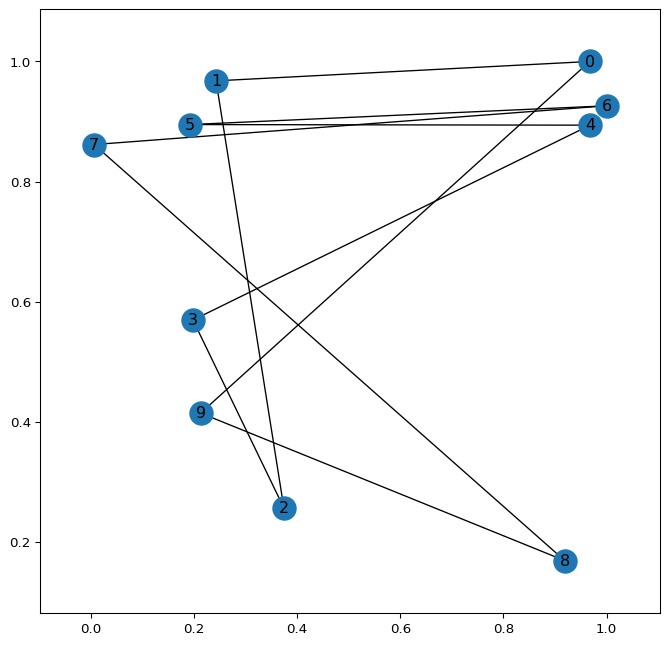

In [ ]:
def plot_current_graph(input_graph, retina_dims=800, my_dpi=96):
    nodes = input_graph.nodes
    num_nodes = input_graph.num_nodes
    dict_positions = {i: nodes[i].detach().cpu().numpy() 
                      for i in range(input_graph.num_nodes)}
    
    # Let's rescale everything to the [0,1]^2 interval
    max_x = np.max(np.abs(np.asarray([item[0] for item in dict_positions.values()])))
    max_y = np.max(np.abs(np.asarray([item[1] for item in dict_positions.values()])))
    dict_positions = {k: np.asarray([x/max_x, y/max_y]) for k, (x, y) in dict_positions.items()}

    retina, ax = plt.subplots(1, 1, figsize=(retina_dims / my_dpi, retina_dims / my_dpi), dpi=my_dpi)

    # Every time since we are changing the node positions we need to recreate
    # a graph from networkx with the new node positions
    G = nx.Graph()
    G.add_nodes_from(range(input_graph.num_arcs))
    G.add_edges_from(input_graph.E)
    nx.draw(G, pos=dict_positions, with_labels=True, ax=ax)
    limits = plt.axis('on')
    ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)

    plt.show()
    plt.close()


# Let's plot the previously created graph
plot_current_graph(input_graph)

### Optimizer and hyperparameters
Now let's define again the optimizer. Please notice how we have no neural network here and that the only things we want to optimize are the actual node positions. 

The NeuralAesthete weights remain freezed after the training, we do not change anymore.

In [ ]:
learning_rate = 0.01
optimizer = torch.optim.Adam([input_graph.nodes], lr=learning_rate)

### Stress Function
Now let's define a function that calculate the stress function. It randomly selects two nodes and it calculates the Stress function:

\begin{equation}
    \text{STRESS}: \sum_{i < j} w_{ij}\big(||p_i - p_j|| - \delta_{ij}\big)^2
\end{equation}

Where 

* $\delta_{ij}$ is the graph theoretic distance (or shortest-path), the \# of hops \\to reach another node
* $p_i, p_j$ coordinates of vertices $i, j$ 
* $w_{ij} = \delta_{ij}^{-1}$, is a weighting factor inversely proportional to $d_{ij}$

In [ ]:
def stress_loss(input_graph):
    loss_c = nn.MSELoss()
    pdist = torch.nn.PairwiseDistance()

    # selects two random nodes
    number_nodes = input_graph.num_nodes
    random_indices = np.random.choice(np.arange(0, number_nodes), 
                                      size=2, replace=False)
    sources, dest = random_indices
    coordinates_sources = input_graph.nodes[sources]
    coordinates_dest = input_graph.nodes[dest]

    # calculate the stress function between these two nodes
    delta = input_graph.shortest_paths[sources, dest]
    delta = torch.tensor(delta, dtype=torch.float).to(device)
    distance = pdist(coordinates_sources, coordinates_dest)
    weight = 1 / (delta + 1e-3)
    loss = weight * loss_c(distance, delta)
    
    return loss

stress_loss(input_graph)

tensor(3.8088, grad_fn=<MulBackward0>)

### Optimization function

Let's write a function that optimize for many iterations a given loss function. 

In [ ]:
from tqdm import tqdm

def optimize_graph(input_graph, loss_fun, iterations=5000, log_interval=500):
        
    pbar = tqdm(range(iterations), ncols=80)
    counter = 0
    while counter < iterations:
        loss = loss_fun(input_graph)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if counter % log_interval == 0 and counter != 0:
            pbar.update(log_interval)
            pbar.set_description(f"l: {loss:.2f}")
            plot_current_graph(input_graph)
        counter += 1

    pbar.update(log_interval)
    plot_current_graph(input_graph)
    pbar.close()


### Drawing with the Stress function
Now let's pair the optimization function with the stress function and let's draw our first graph. 

We reinit the graph each time to restart the drawing very time we re run the cell. Try with different learning rate and number of iterations!

l: 2.14:  10%|██▉                          | 500/5000 [00:00<00:03, 1311.81it/s]

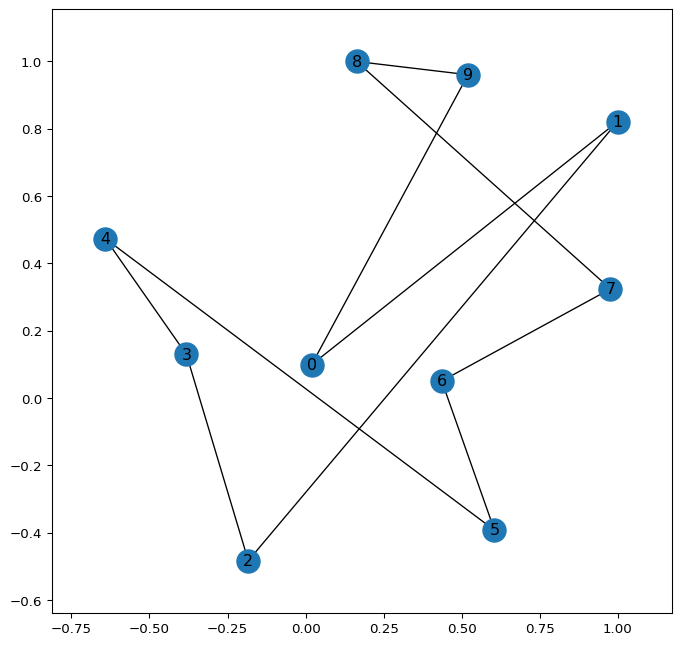

l: 0.03:  20%|█████▊                       | 1000/5000 [00:01<00:05, 760.46it/s]

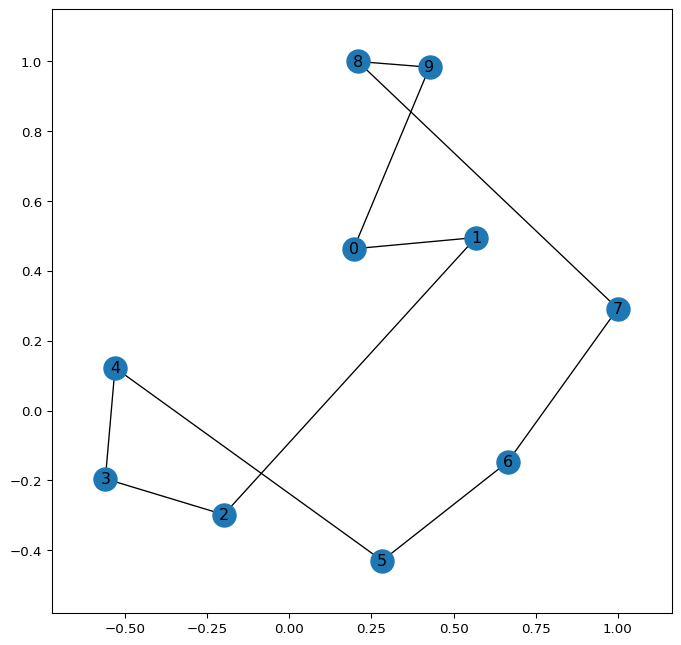

l: 0.04:  30%|████████▋                    | 1500/5000 [00:02<00:05, 695.19it/s]

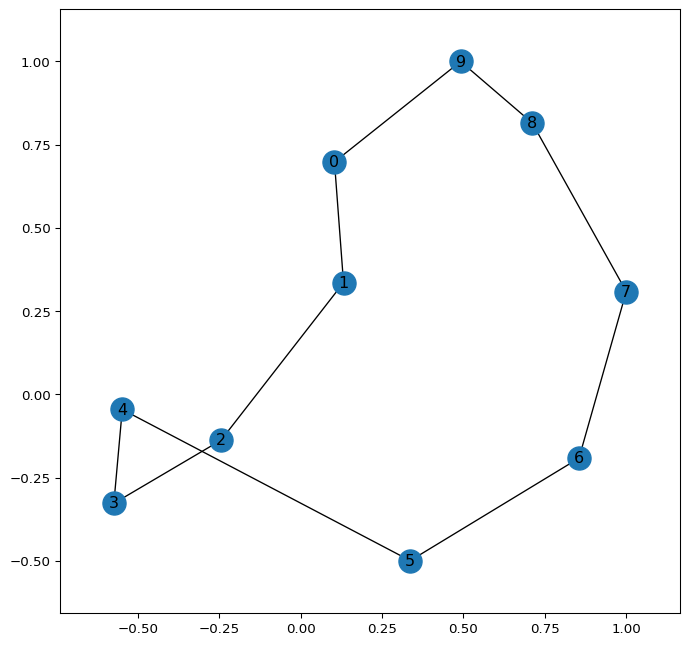

l: 0.21:  40%|███████████▌                 | 2000/5000 [00:02<00:04, 657.36it/s]

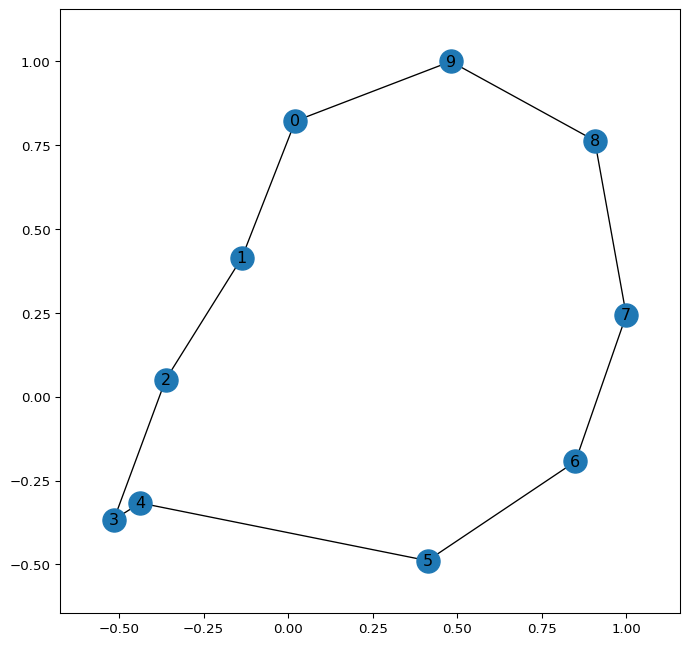

l: 0.04:  50%|██████████████▌              | 2500/5000 [00:03<00:03, 638.40it/s]

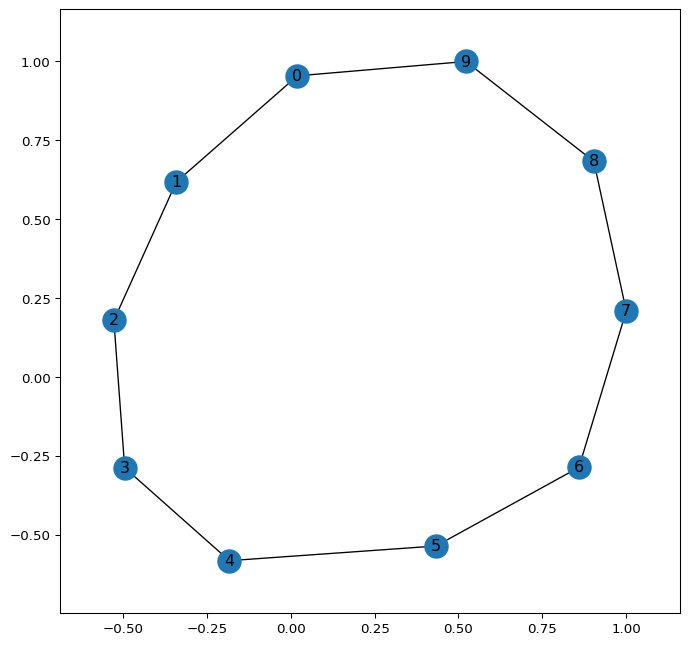

l: 0.04:  60%|█████████████████▍           | 3000/5000 [00:04<00:03, 588.16it/s]

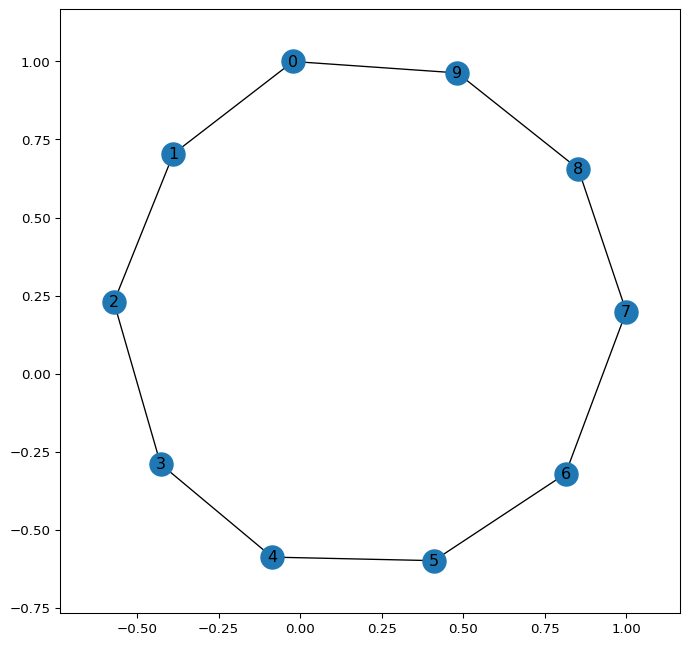

l: 0.01:  70%|████████████████████▎        | 3500/5000 [00:05<00:02, 593.18it/s]

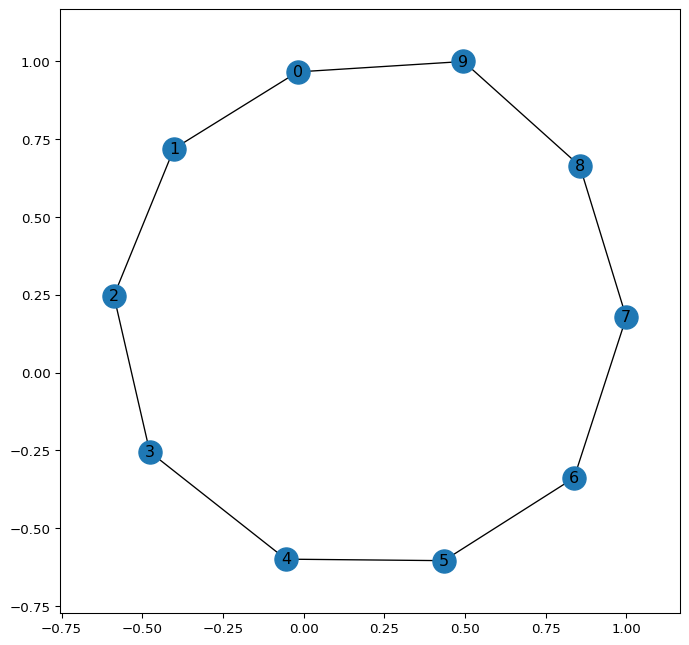

l: 0.00:  80%|███████████████████████▏     | 4000/5000 [00:06<00:01, 589.74it/s]

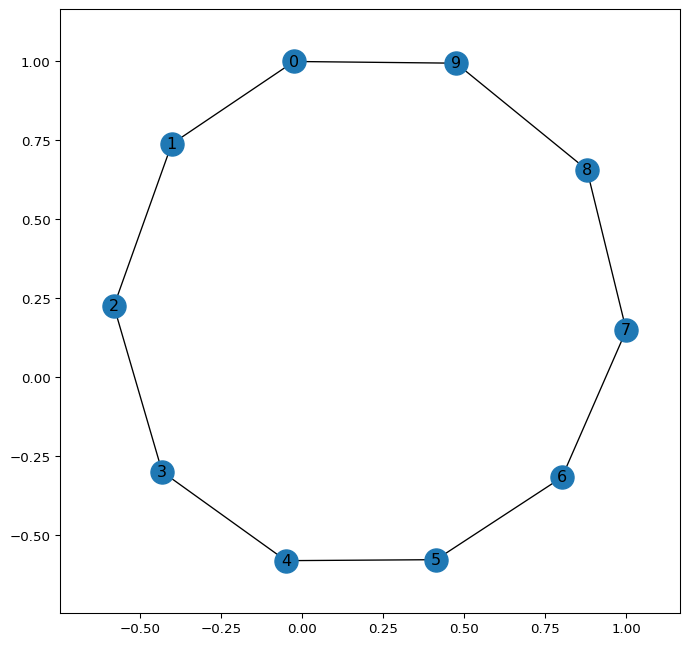

l: 0.02:  90%|██████████████████████████   | 4500/5000 [00:07<00:00, 597.20it/s]

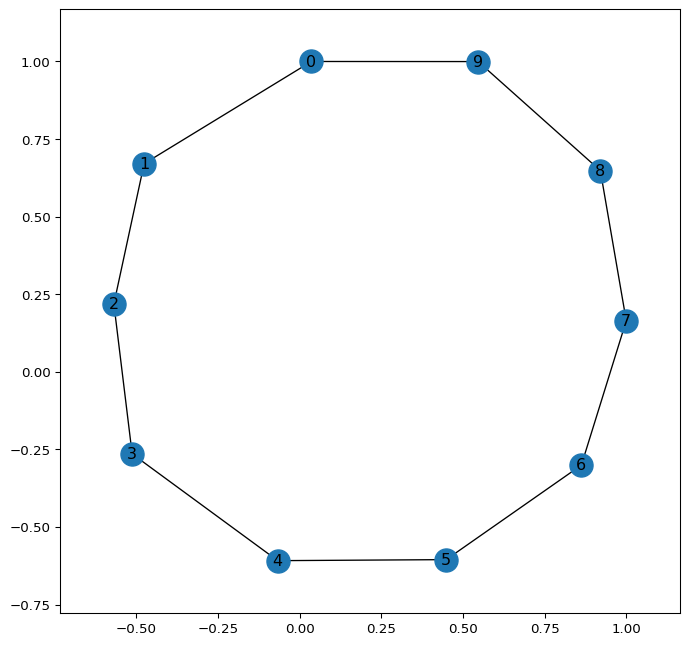

l: 0.02: 100%|█████████████████████████████| 5000/5000 [00:07<00:00, 605.36it/s]

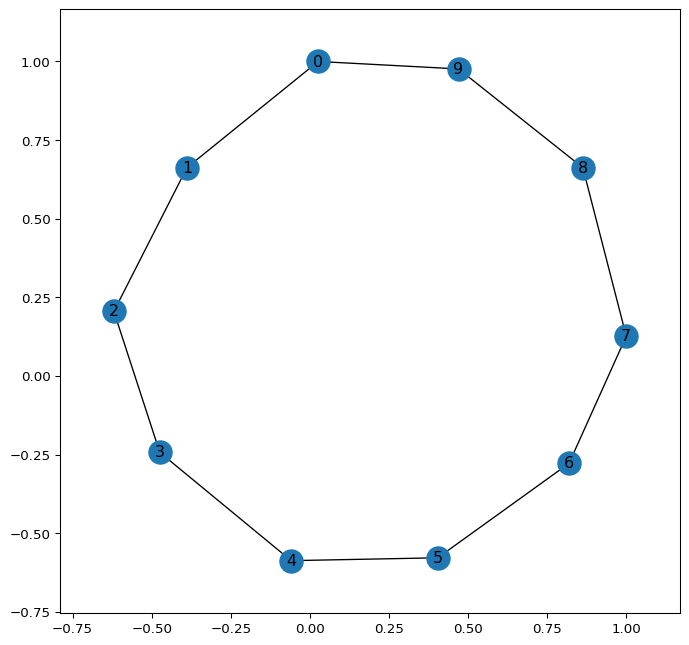

l: 0.02: 100%|█████████████████████████████| 5000/5000 [00:08<00:00, 592.70it/s]


In [ ]:
input_graph.init()
optimizer = torch.optim.Adam([input_graph.nodes], lr=learning_rate)
optimize_graph(input_graph, loss_fun=stress_loss)

### Optimizing the loss given by the Neural Aesthete
Here let's see if you have understand the concepts that we have seen so far and try yourselves to write the neural_aesthete_loss by optimizing the node position in the graph going towards the **non-intersection** direction of the MLP model


In [ ]:
def neural_aesthete_loss(input_graph, batch_size=4):
    ### COMPLETE IT BY YOURSELVES

    return torch.tensor(0)

neural_aesthete_loss(input_graph)


### Drawing with the Neural Aesthete 

Now let's optimize with the function written above.


In [ ]:
input_graph.init()
optimizer = torch.optim.Adam([input_graph.nodes], lr=learning_rate)
optimize_graph(input_graph, loss_fun=neural_aesthete_loss)

NameError: ignored